# Introduction

Notebook to analyze the **General Results** for each model in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner import feat_br_strat_runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions
from modules.utils import tokenizers as tok

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
vol_strat_runner = feat_br_strat_runner.Vol_Strat_Runner()
vol_strat_runner.execute()

lsi_model_4 = vol_strat_runner.get_lsi_model()
lda_model_4 = vol_strat_runner.get_lda_model()
bm25_model_4 = vol_strat_runner.get_bm25_model()
w2v_model_4 = vol_strat_runner.get_word2vec_model()

oracle = vol_strat_runner.get_oracle()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

Feat_BR Volunteers Matrix shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


### Tokenization

In [4]:
tokenizer = tok.PorterStemmerBased_Tokenizer()
bugreports['tokens'] = bugreports.apply(lambda row : tokenizer.__call__(row['br_desc']), axis=1)
features['tokens'] = features.apply(lambda row : tokenizer.__call__(row['feat_desc']), axis=1)

### Results

In [5]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.4,1.0,Bug_Number 1248267 1248268 125...


## General Evaluation

### Mean Document Lengths

In [6]:
mean_bug_report_length = bugreports.tokens.apply(lambda x : len(x)).median()
mean_feature_length = features.tokens.apply(lambda x : len(x)).median()

print("Mean BR length: {:.4}".format(mean_bug_report_length))
print("Mean Feat length: {:.4}".format(mean_feature_length))

Mean BR length: 66.0
Mean Feat length: 32.0


(array([19., 22., 23., 16.,  5.,  2.,  2.,  1.,  0.,  1.]),
 array([ 19. ,  41.1,  63.2,  85.3, 107.4, 129.5, 151.6, 173.7, 195.8,
        217.9, 240. ]),
 <a list of 10 Patch objects>)

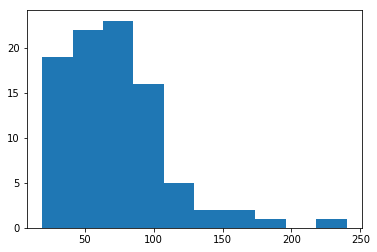

In [7]:
plt.hist(bugreports.tokens.apply(lambda x : len(x)))

(array([11.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  9. ,  40.5,  72. , 103.5, 135. , 166.5, 198. , 229.5, 261. ,
        292.5, 324. ]),
 <a list of 10 Patch objects>)

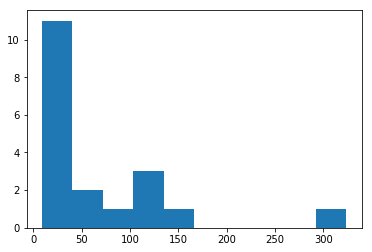

In [8]:
plt.hist(features.tokens.apply(lambda x : len(x)))

## Word Vector Analysis

In [9]:
aux_functions.highlight_df(w2v_model_4.get_sim_matrix())

In [10]:
vals = []
df = w2v_model_4.get_sim_matrix()
for idx,row in df.iterrows():
    for col in df.columns:
        vals.append(df.at[idx,col])

print("mean: {:2.2}".format(pd.Series(vals).mean()))
print("median: {:2.2}".format(pd.Series(vals).median()))
print("std: {:2.2}".format(pd.Series(vals).std()))

mean: 0.86
median: 0.87
std: 0.058


## LDA Analysis

In [11]:
aux_functions.highlight_df(lda_model_4.get_sim_matrix())

In [12]:
lda_model_4.print_topics()

Topic #0: webgl firefox window compat page web open bar tab taskbar
Topic #1: loud speech read html extens text desktop content page use
Topic #2: element stop default http branch set code info forward field
Topic #3: capabl librari render browser firefox http branch element stop default
Topic #4: custom firefox default browser http branch element stop set appear
Topic #5: element stop default http branch set code info forward field
Topic #6: element stop default http branch set code info forward field
Topic #7: menu context option displayport portion apz new zoom pan gecko
Topic #8: download dropmak notif option display http branch element stop default
Topic #9: element stop default http branch set code info forward field
Topic #10: mous lock pointer movement cursor exampl game api rotat click
Topic #11: child certif mode connect account ssl present activ parent doe
Topic #12: indic zoom devic permiss valu need thi user notif default
Topic #13: reader mode firefox shown loud speech re